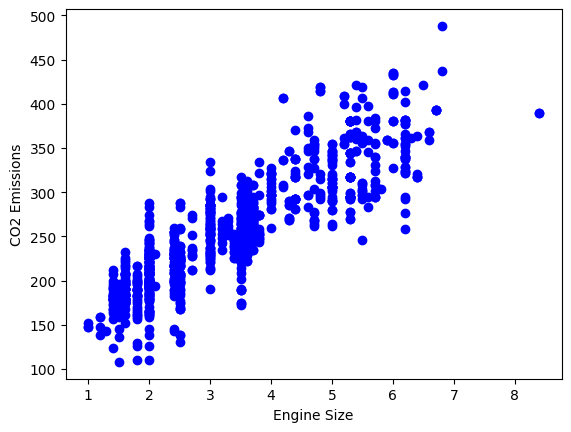

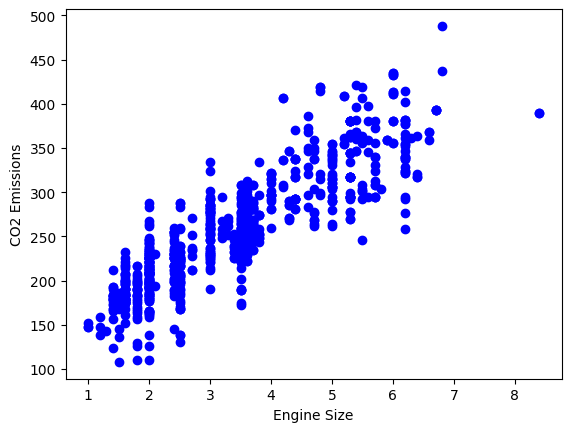

Coefficients: [[11.32414984  7.40272741  9.43043768]]
Mean Squared Error (MSE): 416.57
Variance score (R²): 0.87


C:\Users\nteny\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\nteny\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [10]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

# Load data directly from the URL
path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
df = pd.read_csv(path)

# Selecting relevant columns for analysis
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)  



# Visualize the relationship between Engine size and CO2 Emissions
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")
plt.show()

# Split the data into training and test sets (80% training, 20% testing)
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

# Visualize the training data
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")
plt.show()

# Import Linear Regression model from scikit-learn
from sklearn import linear_model
regr = linear_model.LinearRegression()

# Prepare the feature variables (X) and target variable (y) for training
x_train = train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]
y_train = train[['CO2EMISSIONS']]

# Train the model
regr.fit(x_train, y_train)

# Display the coefficients of the model
print('Coefficients:', regr.coef_)

# Predict CO2 emissions on the test set
x_test = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y_test = np.asanyarray(test[['CO2EMISSIONS']])

y_hat = regr.predict(x_test)

# Calculate Mean Squared Error (MSE)
mse = np.mean((y_hat - y_test) ** 2)
print("Mean Squared Error (MSE): %.2f" % mse)

# Calculate the variance score (R² score)
variance_score = regr.score(x_test, y_test)
print("Variance score (R²): %.2f" % variance_score)

